<AxesSubplot: >

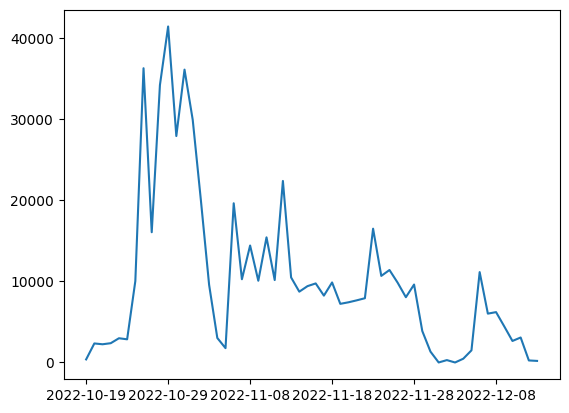

In [2]:
#CREAZIONE DI UN ISTOGRAMMA CHE RAPPRESENTA IL NUMERO DI TWEET PER GIORNO
import pandas as pd

# Plot a line histogram of the number of tweets per day
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\tt.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['created_at'].str[:-9].value_counts().sort_index().plot(kind='line')

POSITIVE WORDS



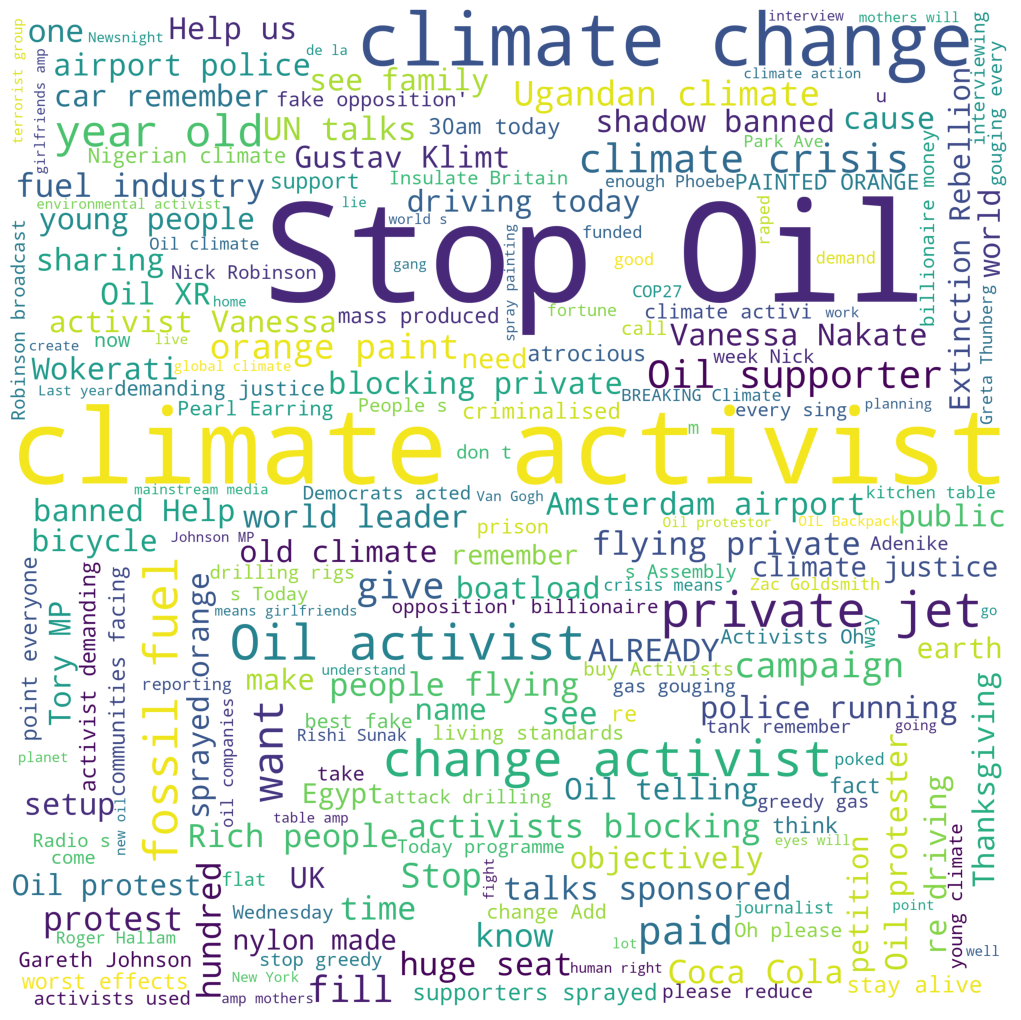

NEGATIVE WORDS



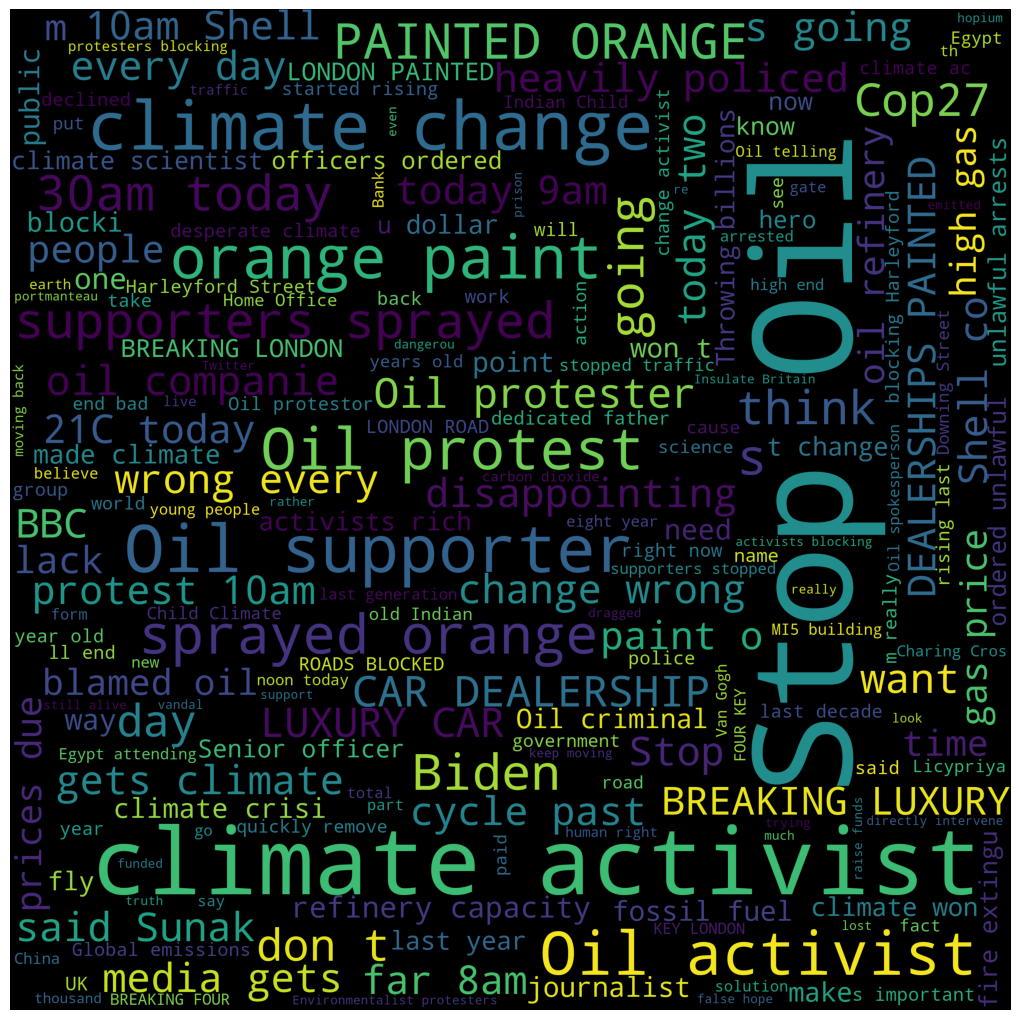

In [4]:
#CREAZIONE DI WORDCLOUD PER I TWEET POSITIVI E NEGATIVI
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
ttoadf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttoa.csv")

data = ttoadf[['tweet_text','Sentiment']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

#rimozione sentimenti neutrali
train = train[train.Sentiment != "neutral"]

train_pos = train[ train['Sentiment'] == 'positive']
train_pos_text = train_pos['tweet_text']

train_neg = train[ train['Sentiment'] == 'negative']
train_neg_text = train_neg['tweet_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("POSITIVE WORDS\n")
wordcloud_draw(train_pos_text, 'white')
print("NEGATIVE WORDS\n")
wordcloud_draw(train_neg_text, 'black')

In [9]:
# PEZZO DI CODICE PER CREAZIONE DEL GRAFO BIPARTITA DELLA RETE
# plot a bipartite graph of the network
import networkx as nx
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\tt.csv", dtype = {'created_at':'str'}, low_memory=False )
G = nx.from_pandas_edgelist(ttdf, target='full_text', edge_attr=True, create_using=nx.Graph())
#display(G)
nx.draw(G, with_labels=True)

KeyboardInterrupt: 

In [3]:
# PEZZO DI CODICE PER SENTIMENTAL ANALYSIS CON TEXTBLOB E CREAZIONE DI UN NUOVO CSV CON I SENTIMENTI
import pandas as pd
import textblob
from textblob import TextBlob
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttNoCol.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['full_text'] = ttdf['full_text'].astype(str)
ttdf['Sentiment'] = ttdf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
ttdf['Sentiment'] = ttdf['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
#ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpy.csv", index=False)


In [8]:
#PULIZIA DATASET
'''
ttdf.drop('in_reply_to_status_id',axis=1, inplace=True)
ttdf.drop('in_reply_to_status_id_str',axis=1, inplace=True)
ttdf.drop('in_reply_to_user_id',axis=1, inplace=True)
ttdf.drop('in_reply_to_user_id_str',axis=1, inplace=True)
ttdf.drop('retweeted_status',axis=1, inplace=True)
ttdf.drop('withheld_in_countries',axis=1, inplace=True)
ttdf.drop('quoted_status_id',axis=1, inplace=True)
ttdf.drop('quoted_status_id_str',axis=1, inplace=True)
ttdf.drop('quoted_status',axis=1, inplace=True)
'''
ttdf.head()
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpyNoCol.csv", index=False)

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

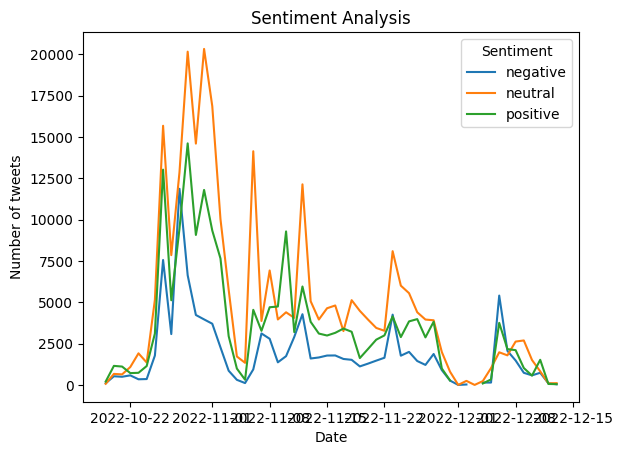

In [33]:
#3 LINE CHART CON SENTIMENTI DEL DATASET TTPY
import matplotlib.pyplot as plt
ttpydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpyNoCol.csv", dtype = {'created_at':'str'}, low_memory=False )

# plot a 3 line chart with sentiments from ttpydf dataset and reduce the y values
ttpydf['date'] = pd.to_datetime(ttpydf['created_at']).dt.date
#plt.show(ttpydf.groupby('date')['Sentiment'].value_counts().unstack().plot())
plot = ttpydf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)
#clean the ylabel of the previous plot
